In [1]:
X = [1,2,4,5,6,7,11,12,13,3,6,8,19]
Y = [8217,8122,8414,8343,8287,8237,8084,8077,8067,8099,8030,8235,7926]

In [2]:
def mean(v):
    sum = 0
    for i in v:
        sum = sum + i
    mean_v = (sum / len(v))
    return mean_v


In [3]:
mean_x = mean(X)
mean_y = mean(Y)
cov = 0
for i in range(len(X)):
    cov = cov + ((X[i] - mean_x)*(Y[i] - mean_y))
print("Covariance of COV(X,Y) : ", cov/(len(X)-1))

Covariance of COV(X,Y) :  -422.4807692307692


In [4]:
cov = 0
for i in range(len(X)):
    cov = cov + ((X[i] - mean_x)*(X[i] - mean_x))
print("Covariance of COV(X,X) : ", cov/(len(X)-1))

Covariance of COV(X,X) :  25.93589743589743


In [5]:
cov = 0
for i in range(len(Y)):
    cov = cov + ((Y[i] - mean_y)*(Y[i] - mean_y))
print("Covariance of COV(Y,Y) : ", cov/(len(Y)-1))

Covariance of COV(Y,Y) :  18901.102564102566


In [6]:
import numpy as np
cov_mat = np.array((25.935,-422.480, -422.480,18901.102))
print(cov_mat)

[   25.935  -422.48   -422.48  18901.102]


# PCA from scratch

In [7]:
import numpy as np
data = np.array([[3,4],[2,8],[6,9]])

In [8]:
data

array([[3, 4],
       [2, 8],
       [6, 9]])

In [9]:
import pandas as pd
data = pd.DataFrame(data = data, columns = ["rank", "point"])
data

,rank,point
0,3,4
1,2,8
2,6,9


In [10]:
import matplotlib.pyplot as plt

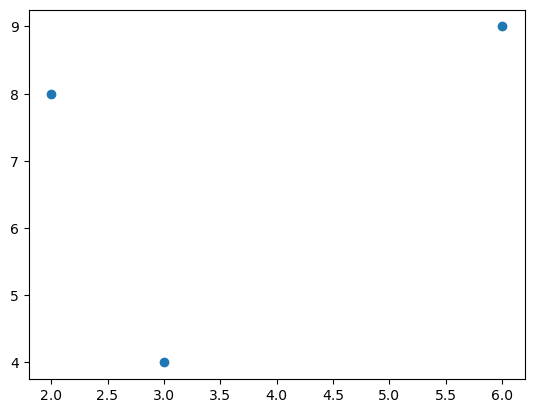

In [11]:
plt.scatter(data["rank"], data["point"])

In [12]:
mean_of_each_feature = np.mean(data.T, axis = 1)

In [13]:
print(mean_of_each_feature)

rank     3.666667
point    7.000000
dtype: float64


In [14]:
scale_data = data - mean_of_each_feature # scaling data

In [15]:
covariance_matrix = np.cov(scale_data.T)

In [16]:
covariance_matrix

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [17]:
from numpy.linalg import eig
eigen_value, eigen_vector = eig(covariance_matrix)

In [18]:
eigen_value

array([2.83333333, 8.5       ])

In [19]:
eigen_vector

array([[-0.85749293, -0.51449576],
       [ 0.51449576, -0.85749293]])

In [20]:
converted_data = eigen_vector.T.dot(scale_data.T) # Back to the covariance data

In [21]:
converted_data.T

array([[-9.71825316e-01,  2.91547595e+00],
       [ 1.94365063e+00,  1.11022302e-16],
       [-9.71825316e-01, -2.91547595e+00]])

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components= 2)
pca.fit_transform(data)

array([[ 2.91547595e+00, -9.71825316e-01],
       [-6.86635020e-16,  1.94365063e+00],
       [-2.91547595e+00, -9.71825316e-01]])

In [24]:
print(-6.86635020e-16 == 1.11022302e-16)

False


In [25]:
print(-6.86635020e-16 - 1.11022302e-16)

-7.97657322e-16


In [26]:
pca.explained_variance_ratio_

array([0.75, 0.25])

# PCA from Dataset 

In [27]:
from sklearn.datasets import load_breast_cancer

In [28]:
dataset = load_breast_cancer()
data = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
data.shape

(569, 30)

In [30]:
mean_of_each_feature = np.mean(data.T, axis = 1)

In [31]:
scale_data = data - mean_of_each_feature

In [32]:
scale_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,3.862708,-8.909649,30.830967,346.110896,0.02204,0.173259,0.211301,0.098181,0.060738,0.015912,...,9.11081,-8.347223,77.338787,1138.416872,0.029831,0.411335,0.439712,0.150794,0.170024,0.034954
1,6.442708,-1.519649,40.930967,671.110896,-0.01162,-0.025701,-0.001899,0.021251,0.000038,-0.006128,...,8.72081,-2.267223,51.538787,1075.416872,-0.008569,-0.067665,-0.030588,0.071394,-0.015076,0.005074
2,5.562708,1.960351,38.030967,548.110896,0.01324,0.055559,0.108601,0.078981,0.025738,-0.002808,...,7.30081,-0.147223,45.238787,828.416872,0.012031,0.170235,0.178212,0.128394,0.071224,0.003634
3,-2.707292,1.090351,-14.389033,-268.789104,0.04614,0.179559,0.152601,0.056281,0.078538,0.034642,...,-1.35919,0.822777,-8.391213,-312.883128,0.077431,0.612035,0.414712,0.142894,0.373724,0.089054
4,6.162708,-4.949649,43.130967,642.110896,0.00394,0.028459,0.109201,0.055381,-0.000262,-0.003968,...,6.27081,-9.007223,44.938787,694.416872,0.005031,-0.049265,0.127812,0.047894,-0.053676,-0.007166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,7.432708,3.100351,50.030967,824.110896,0.01464,0.011559,0.155101,0.089981,-0.008562,-0.006568,...,9.18081,0.722777,58.838787,1146.416872,0.008631,-0.042965,0.138512,0.106994,-0.084076,-0.012796
565,6.002708,8.960351,39.230967,606.110896,0.00144,-0.000941,0.055201,0.048991,-0.005962,-0.007468,...,7.42081,12.572777,47.738787,850.416872,-0.015769,-0.062065,0.049312,0.048194,-0.032876,-0.017576
566,2.472708,8.790351,16.330967,203.210896,-0.01181,-0.002041,0.003711,0.004101,-0.022162,-0.006318,...,2.71081,8.442777,19.438787,243.416872,-0.018469,0.055135,0.068112,0.027194,-0.068276,-0.005746
567,6.472708,10.040351,48.130967,610.110896,0.02144,0.172659,0.262601,0.103081,0.058538,0.007362,...,9.47081,13.742777,77.338787,940.416872,0.032631,0.613835,0.666512,0.150394,0.118624,0.040054


In [33]:
covariance_matrix = np.cov(scale_data.T)

In [34]:
covariance_matrix

array([[ 1.24189201e+01,  4.90758156e+00,  8.54471417e+01,
         1.22448341e+03,  8.45445983e-03,  9.41970568e-02,
         1.90127582e-01,  1.12475116e-01,  1.42731729e-02,
        -7.75370629e-03,  6.63650325e-01, -1.89188600e-01,
         4.80354973e+00,  1.17968162e+02, -2.35533633e-03,
         1.30005142e-02,  2.06588280e-02,  8.17956306e-03,
        -3.03898170e-03, -3.97624858e-04,  1.65137495e+01,
         6.43310002e+00,  1.14288570e+02,  1.88822722e+03,
         9.62462515e-03,  2.29249204e-01,  3.87386440e-01,
         1.72392739e-01,  3.57457580e-02,  4.49735060e-04],
       [ 4.90758156e+00,  1.84989087e+01,  3.44397592e+01,
         4.85993787e+02, -1.41477877e-03,  5.37668058e-02,
         1.03692344e-01,  4.89769268e-02,  8.41887566e-03,
        -2.32115824e-03,  3.29037393e-01,  9.16695072e-01,
         2.44944877e+00,  5.08408652e+01,  8.54099045e-05,
         1.47865987e-02,  1.86039300e-02,  4.34837964e-03,
         3.24506954e-04,  6.19772637e-04,  7.32926700e+

In [35]:
from numpy.linalg import eig
eigen_value, eigen_vector = eig(covariance_matrix)

In [36]:
eigen_value

array([4.43782605e+05, 7.31010006e+03, 7.03833742e+02, 5.46487379e+01,
       3.98900178e+01, 3.00458768e+00, 1.81533030e+00, 3.71466740e-01,
       1.55513547e-01, 8.40612196e-02, 3.16089533e-02, 7.49736514e-03,
       3.16165652e-03, 2.16150395e-03, 1.32653879e-03, 6.40269304e-04,
       3.74883320e-04, 2.35169626e-04, 1.84583467e-04, 1.64180064e-04,
       7.81102011e-05, 5.76111660e-05, 3.49172775e-05, 2.83952689e-05,
       1.61463677e-05, 1.24902419e-05, 7.01997261e-07, 3.68048171e-06,
       2.84790425e-06, 2.00491564e-06])

In [37]:
eigen_vector

array([[ 5.08623202e-03,  9.28705650e-03, -1.23425821e-02,
        -3.42380473e-02, -3.54561138e-02, -1.31213101e-01,
         3.35131912e-02,  7.54924585e-02, -3.50549264e-01,
        -1.39559852e-01,  4.19346972e-01, -7.35141931e-01,
         2.18087182e-01,  8.10260113e-02, -1.37865559e-01,
         1.41957144e-01,  4.42129324e-02, -8.97292328e-02,
        -2.10057742e-02, -8.01074429e-02,  5.94747777e-02,
         8.72363409e-03,  4.57847381e-03, -2.82894830e-02,
         3.59617411e-03,  1.60336173e-03, -6.48447162e-04,
         2.79341068e-03, -3.25869730e-03,  5.12865810e-04],
       [ 2.19657026e-03, -2.88160658e-03, -6.35497857e-03,
        -3.62415111e-01,  4.43187450e-01, -2.13486089e-01,
        -7.84253475e-01,  6.87405638e-02,  4.08376429e-03,
        -7.66679112e-02, -2.90168453e-02,  1.77040388e-03,
         4.23058843e-03,  1.98471260e-03,  7.07543943e-03,
         3.71772553e-03, -1.74411881e-03,  1.41458884e-04,
        -1.24960485e-03,  2.12853659e-04, -5.08486619e-

In [38]:
converted_data = eigen_vector.T.dot(scale_data.T)

In [39]:
converted_data.T

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.98175001e-03,  1.29334919e-03, -1.98910417e-03],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
         8.33646201e-05, -1.34685217e-03, -6.85925212e-04],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
        -1.77646614e-04,  1.84867758e-05,  7.75218581e-04],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
         1.32523400e-03,  2.54369638e-05, -4.83858890e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
        -2.69786259e-03,  1.23547951e-03,  8.08728730e-04],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
        -1.12887112e-03, -4.44552928e-03, -2.42876427e-04]])

In [40]:
pca = PCA(n_components= 2)
pca.fit_transform(data)

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

In [41]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

# Breast Cancer Classification 

In [42]:
from sklearn.datasets import load_breast_cancer

In [43]:
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [44]:

data = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
y = dataset.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scalar = StandardScaler()
scalar.fit(data)


StandardScaler()

In [48]:
data_x = pd.DataFrame(data = scalar.transform(data), columns = data.columns)
data_x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=2)

In [51]:
pca_data = pca.fit_transform(data_x)

In [52]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.25, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression()

In [74]:
model.fit(x_train, y_train)

LogisticRegression()

In [75]:
pred = model.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
confusion_matrix(y_test, pred)

array([[53,  1],
       [ 2, 87]], dtype=int64)

In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

